In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import spacy
from spacy.matcher import Matcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from collections import Counter
nltk.download('wordnet')
import numpy

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaitanyadeepikakudupudi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
reviews = pd.read_csv('yelp_kimos.csv')

In [3]:
reviews = reviews[:-1]
reviews

,Date,Rating,Review,Name,Location,Rating_v1
0,9/28/2017,4.0 star rating,I really liked their menu set up. Fresh fish ...,Amy E.,"Fremont, CA",4.0 star rating
1,9/19/2017,5.0 star rating,Went for dinner on our 1st night in Maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating
2,9/17/2017,3.0 star rating,Beautiful beachfront restaurant in Lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating
3,8/31/2017,5.0 star rating,One of my My favorite restaurants in Maui wit...,Amber V.,"Las Vegas, NV",4.0 star rating
4,9/22/2017,4.0 star rating,"After lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating
...,...,...,...,...,...,...
2075,10/28/2008,4.0 star rating,"Okay so I used to work here, I'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating
2076,9/17/2009,5.0 star rating,For our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating
2077,2/18/2009,4.0 star rating,Kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating
2078,10/14/2007,5.0 star rating,Lunch. Fish sandwich - Kimo's style (not spic...,Kanani P.,"San Francisco, CA",4.0 star rating


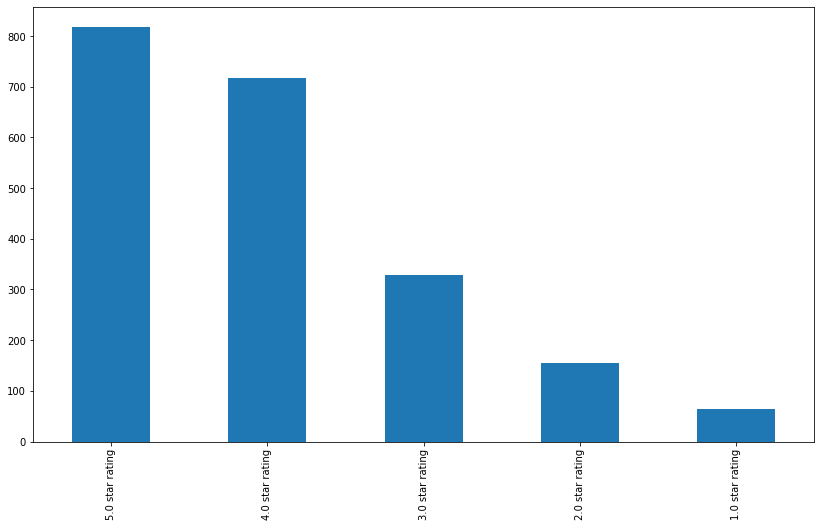

In [4]:
reviews['Rating'].value_counts().plot(kind='bar', figsize=(14,8));

In [5]:
reviews['Review'] = reviews['Review'].astype(str)
reviews['Rating'] = reviews['Rating'].str[:1].astype(int)

In [6]:
#Lowercasing all the review content to make data normalised and keep words in uniform manner
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [7]:
#removing special characters: Since these special characters create their own tokens and hence not usefull in any kind of 
#algorithm
reviews['review_new'] = reviews['Review'].str.replace('[^\w\s]','')

In [8]:
#removing stopwords from the reviews, because there words have no predictive power in reality
# for example: i, me, myself
stop = stopwords.words('english')
reviews['review_new'] = reviews['review_new'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [9]:
#Stemming: helps to gain relevant information as it reduces all words with the same roots to a 
#common form by removing suffixes such as -action, ing, -es and -ses.
#BUT  there can be problematic where there are spelling errors.

st = PorterStemmer()
reviews['review_stemmer'] = reviews['review_new'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


#LEMMATIZING: creates a common word reducing the use of tenses which likely removes suffixes
lem = WordNetLemmatizer()
reviews['review_lemmatizer'] = reviews['review_stemmer'].apply(lambda x: " ".join([lem.lemmatize(word) for word in x.split()]))


In [10]:
reviews

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer
0,9/28/2017,4,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,really liked menu set fresh fish selection cha...,realli like menu set fresh fish select chang d...,realli like menu set fresh fish select chang d...
1,9/19/2017,5,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimy son 15 loves cook...,went dinner 1st night mauimi son 15 love cook ...,went dinner 1st night mauimi son 15 love cook ...
2,9/17/2017,3,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beautiful beachfront restaurant lahaina town b...,beauti beachfront restaur lahaina town beauti ...,beauti beachfront restaur lahaina town beauti ...
3,8/31/2017,5,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorite restaurants maui view food die ob...,one favorit restaur maui view food die obvious...,one favorit restaur maui view food die obvious...
4,9/22/2017,4,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch wanted go people watch boardwalk later g...,lunch want go peopl watch boardwalk later grab...,lunch want go peopl watch boardwalk later grab...
...,...,...,...,...,...,...,...,...,...
2075,10/28/2008,4,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay used work im completely biased eaten ever...,okay use work im complet bias eaten everyth me...,okay use work im complet bias eaten everyth me...
2076,9/17/2009,5,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first family trip neighbor island maui place m...,first famili trip neighbor island maui place m...,first famili trip neighbor island maui place m...
2077,2/18/2009,4,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimos one best spots watch sunset lounge area ...,kimo one best spot watch sunset loung area cre...,kimo one best spot watch sunset loung area cre...
2078,10/14/2007,5,lunch. fish sandwich - kimo's style (not spicy...,Kanani P.,"San Francisco, CA",4.0 star rating,lunch fish sandwich kimos style spicy cajun st...,lunch fish sandwich kimo style spici cajun sty...,lunch fish sandwich kimo style spici cajun sty...


In [11]:
#the first score is sentiment polarity which tells if the sentiment is positive or negative 
#and the second score is subjectivity score to tell how subjective is the text
def sentiment(x):
    return TextBlob(x).sentiment  

reviews['review_score'] = reviews['review_new'].apply(sentiment)

reviews

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer,review_score
0,9/28/2017,4,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,really liked menu set fresh fish selection cha...,realli like menu set fresh fish select chang d...,realli like menu set fresh fish select chang d...,"(0.3596590909090908, 0.575)"
1,9/19/2017,5,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimy son 15 loves cook...,went dinner 1st night mauimi son 15 love cook ...,went dinner 1st night mauimi son 15 love cook ...,"(0.75, 0.5875)"
2,9/17/2017,3,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beautiful beachfront restaurant lahaina town b...,beauti beachfront restaur lahaina town beauti ...,beauti beachfront restaur lahaina town beauti ...,"(0.20606060606060603, 0.6450757575757576)"
3,8/31/2017,5,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorite restaurants maui view food die ob...,one favorit restaur maui view food die obvious...,one favorit restaur maui view food die obvious...,"(0.24363636363636365, 0.59)"
4,9/22/2017,4,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch wanted go people watch boardwalk later g...,lunch want go peopl watch boardwalk later grab...,lunch want go peopl watch boardwalk later grab...,"(0.3017857142857143, 0.3834325396825397)"
...,...,...,...,...,...,...,...,...,...,...
2075,10/28/2008,4,"okay so i used to work here, i'm completely bi...",Audrey S.,"Lahaina, HI",4.0 star rating,okay used work im completely biased eaten ever...,okay use work im complet bias eaten everyth me...,okay use work im complet bias eaten everyth me...,"(0.4611542443064182, 0.5409247757073843)"
2076,9/17/2009,5,for our first family trip to the neighbor isla...,Leilani D.,"Waianae, HI",4.0 star rating,first family trip neighbor island maui place m...,first famili trip neighbor island maui place m...,first famili trip neighbor island maui place m...,"(0.2826704545454546, 0.5187499999999999)"
2077,2/18/2009,4,kimo's has one of the best spots to watch the ...,Matt P.,"Los Angeles, CA",4.0 star rating,kimos one best spots watch sunset lounge area ...,kimo one best spot watch sunset loung area cre...,kimo one best spot watch sunset loung area cre...,"(0.23190476190476192, 0.4373015873015873)"
2078,10/14/2007,5,lunch. fish sandwich - kimo's style (not spicy...,Kanani P.,"San Francisco, CA",4.0 star rating,lunch fish sandwich kimos style spicy cajun st...,lunch fish sandwich kimo style spici cajun sty...,lunch fish sandwich kimo style spici cajun sty...,"(-0.002499999999999991, 0.5575)"


In [12]:
reviews[['polarity', 'subjectivity']] = pd.DataFrame(reviews['review_score'].tolist(), index=reviews.index)

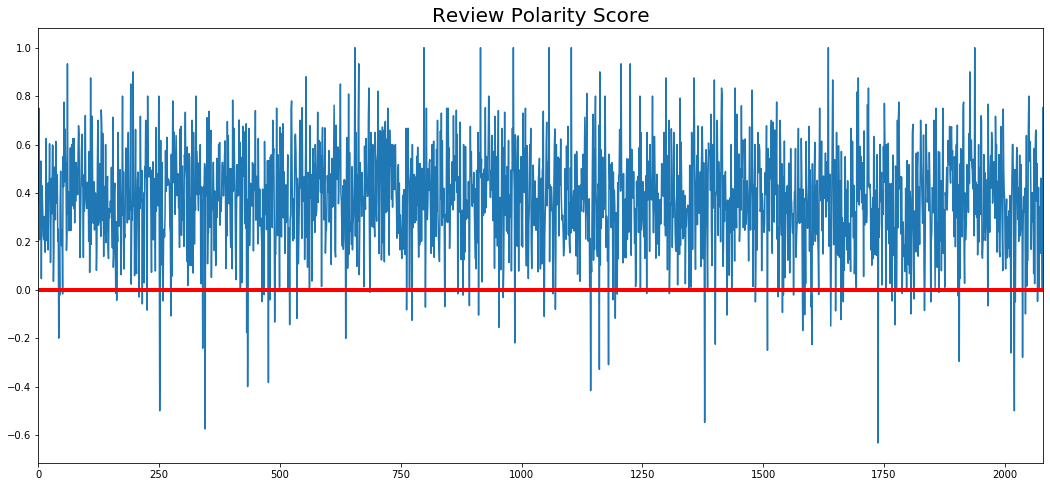

In [13]:
reviews['polarity'].plot(figsize=(18,8));
plt.title('Review Polarity Score',fontsize = 20);
plt.axhline(y=0, linewidth=4, color='r');

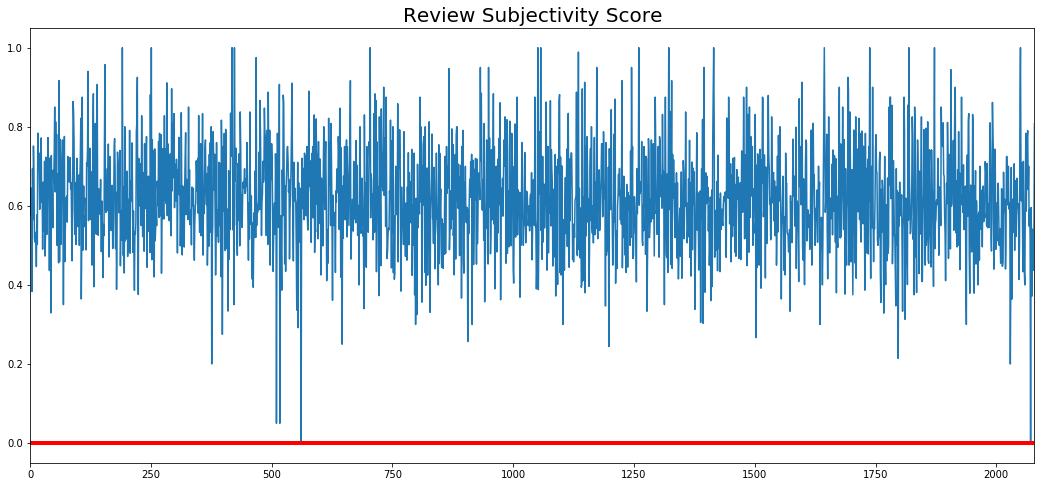

In [14]:
reviews['subjectivity'].plot(figsize=(18,8));
plt.title('Review Subjectivity Score',fontsize = 20);
plt.axhline(y=0, linewidth=4, color='r');

In [15]:
nlp = spacy.load("en_core_web_sm")
analyser = SentimentIntensityAnalyzer()

In [16]:
# Maintaining a super set of negative terms that even contains the existing terms
neg_list = []
with open('negative-words.txt', encoding='latin-1') as f:
    for line in f:
        line = line.replace('\n','')
        neg_list.append(str(line))

In [17]:
# function to identify the negative terms and update the existing dictionary with the terms that are not
# in the existing dictionary
def neg_terms(x):
    neg_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') > pol.get('pos'):
                    neg_wrd.append(tok.text)
                    if tok.text not in neg_list:
                        file1 = open("negative-words.txt","a") 
                        file1.writelines('\n' + str(tok.text))
                        neg_list.append(tok.text)
    return neg_wrd
                    
reviews['Negative Terms'] = reviews['review_new'].apply(neg_terms)            

In [18]:
# Maintaining a super set of positive terms that even contains the existing terms
pos_list = []
with open('positive-words.txt', encoding='latin-1') as f:
    for line in f:
        line = line.replace('\n','')
        pos_list.append(str(line))

In [19]:
def pos_terms(x):
    pos_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'ADJ' or tok.pos_ == 'VERB':
                pol = analyser.polarity_scores(tok.text)
                if pol.get('neg') < pol.get('pos'):
                    pos_wrd.append(tok.text)
                    if tok.text not in pos_list:
                        file1 = open("positive-words.txt","a") 
                        file1.writelines('\n' + str(tok.text))
                        pos_list.append(tok.text)
    return pos_wrd
                    
reviews['Positive Terms'] = reviews['review_new'].apply(pos_terms)

In [20]:
asp_ss = [] #Super set of aspect terms to be used in wordcloud later
def asp_terms(x):
    asp_wrd = []
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        for tok in doc: 
            if tok.pos_ == 'NOUN' or tok.pos_ == 'PRONOUN':
                    asp_wrd.append(tok.text)
                    asp_ss.append(tok.text)
    return asp_wrd
                    
reviews['Aspect Terms'] = reviews['review_new'].apply(asp_terms)

In [21]:
reviews.head()

,Date,Rating,Review,Name,Location,Rating_v1,review_new,review_stemmer,review_lemmatizer,review_score,polarity,subjectivity,Negative Terms,Positive Terms,Aspect Terms
0,9/28/2017,4,i really liked their menu set up. fresh fish s...,Amy E.,"Fremont, CA",4.0 star rating,really liked menu set fresh fish selection cha...,realli like menu set fresh fish select chang d...,realli like menu set fresh fish select chang d...,"(0.3596590909090908, 0.575)",0.359659,0.575000,[stressful],"[liked, fresh, great, sweet, lol]","[menu, fish, selection, day, preparation, port..."
1,9/19/2017,5,went for dinner on our 1st night in maui..my s...,Jill C.,"Puerto Real, Puerto Rico",4.0 star rating,went dinner 1st night mauimy son 15 loves cook...,went dinner 1st night mauimi son 15 love cook ...,went dinner 1st night mauimi son 15 love cook ...,"(0.75, 0.5875)",0.750000,0.587500,[],"[loves, best, outstanding]","[dinner, night, restaurants, fish, caper, sauc..."
2,9/17/2017,3,beautiful beachfront restaurant in lahaina tow...,Saleen D.,"San Diego, CA",4.0 star rating,beautiful beachfront restaurant lahaina town b...,beauti beachfront restaur lahaina town beauti ...,beauti beachfront restaur lahaina town beauti ...,"(0.20606060606060603, 0.6450757575757576)",0.206061,0.645076,[wrong],"[beautiful, thank, gorgeous, friendly, good, p...","[town, restaurant, reservation, dine, table, v..."
3,8/31/2017,5,one of my my favorite restaurants in maui with...,Amber V.,"Las Vegas, NV",4.0 star rating,one favorite restaurants maui view food die ob...,one favorit restaur maui view food die obvious...,one favorit restaur maui view food die obvious...,"(0.24363636363636365, 0.59)",0.243636,0.590000,"[die, crash, die]","[favorite, want, fresh, wonderful, enjoying, r...","[restaurants, view, food, fish, steaks, dishes..."
4,9/22/2017,4,"after lunch, we wanted to go people watch on t...",Dan O.,"Madison Heights, MI",4.0 star rating,lunch wanted go people watch boardwalk later g...,lunch want go peopl watch boardwalk later grab...,lunch want go peopl watch boardwalk later grab...,"(0.3017857142857143, 0.3834325396825397)",0.301786,0.383433,[],"[great, sure, love]","[lunch, people, drink, door, pavaillion, water..."


In [22]:
#Frequency Distribution for Wordcloud
fdist = FreqDist(asp_ss)
topterms = fdist.most_common(50)

In [23]:
# concatenating the top terms from the list to be passed onto the wordcloud
term_str = ' '
for a, c in topterms:
    term_str = term_str + a + ' '

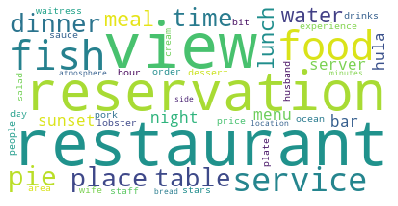

In [24]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300).generate(term_str)
plt.imshow(wordcloud)
wordcloud.to_file("wordcloud_aspect_terms.png")
plt.tight_layout()
plt.axis("off")
plt.show()

In [25]:
#Definig a pattern for words to retrieve the required N-grams
ngrams_wc = []
def sp_pattern(x):
    ngrams_ss = []
    n_g = []
    n_g1 = []
    n_g2 = []
    n_g3 = []
    n_g4 = []
    n_g5 = []
    matcher = Matcher(nlp.vocab)
    text = x.split('.')
    for i in text:    
        doc = nlp(i)    
        pattern = [
                {'POS': 'VERB'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern1 = [
                {'POS': 'ADJ'}, 
                {'POS': 'NOUN'},
                {'POS': 'NOUN', 'OP': '?'},
                ]

        pattern2 = [
                {'DEP': 'ROOT', 'OP': '?'},
                {'POS': 'ADJ'}, 
                {'POS': 'PROPN'},
                ]

        pattern3 = [
                {'POS': 'ADJ'}, 
                {'POS': 'VERB'},
                ]

        pattern4 = [
                {'POS': 'PROPN', 'OP': '?'}, 
                {'POS': 'NOUN'},
                {'POS': 'ADJ'},
                ]

        pattern5 = [ 
                {'POS': 'VERB'},
                {'POS': 'PROPN'},
                ]
        
        matcher.add('PATTERN', None, pattern)

        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                n_g.append(ngrams.lemma_)
                ngrams_ss.append(ngrams.lemma_)
                ngrams_wc.append(ngrams.lemma_)
 
        matcher.add('PATTERN1', None, pattern1)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g:
                    n_g1.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)

        matcher.add('PATTERN2', None, pattern2)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1:
                    n_g2.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN3', None, pattern3)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2:
                    n_g3.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN4', None, pattern4)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3:
                    n_g4.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
            
        matcher.add('PATTERN5', None, pattern5)
        if len(i) > 1:
            matches = matcher(doc)
            for match_id, start, end in matches:
                # Get the matched span
                ngrams = doc[start:end]
                if ngrams.lemma_ not in n_g and ngrams.lemma_ not in n_g1 and ngrams.lemma_ not in n_g2 and ngrams.lemma_ not in n_g3 and ngrams.lemma_ not in n_g4:
                    n_g5.append(ngrams.lemma_)
                    ngrams_ss.append(ngrams.lemma_)
                    ngrams_wc.append(ngrams.lemma_)
    
    return ngrams_ss

In [26]:
reviews['Ngrams'] = reviews['review_new'].apply(sp_pattern)

In [27]:
fdist = FreqDist(ngrams_wc)
topterms_ng = fdist.most_common(50)

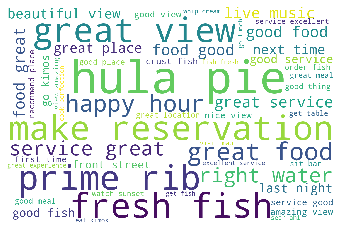

In [28]:
mylist = []
for a,c in topterms_ng:
    mylist.append(a)

wordc=Counter(mylist)

wordcloud = WordCloud(stopwords=STOPWORDS, width = 1500, height = 1000,
                          background_color='white', 
                      max_words=300).generate_from_frequencies(wordc)
wordcloud.to_file("wordcloud_n_grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

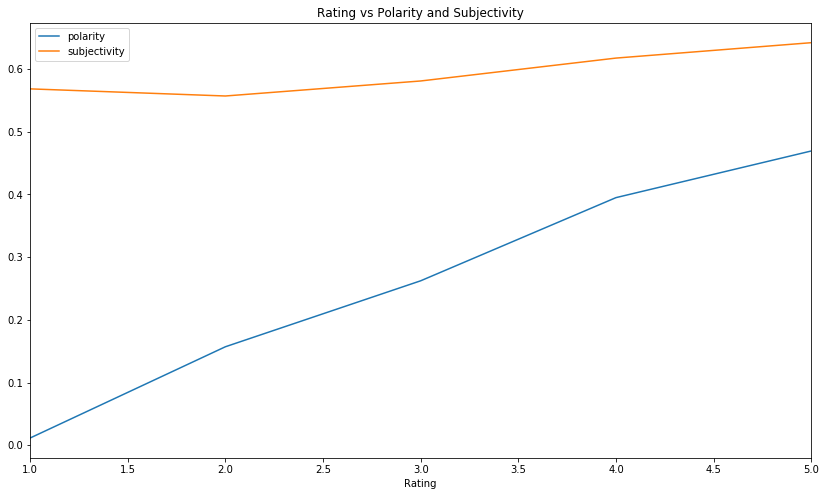

In [29]:
df_review = reviews.groupby(['Rating']).mean()
df_review
df_review.plot(figsize=(14,8),title = 'Rating vs Polarity and Subjectivity');

In [30]:
term = term_str.split(' ')

In [31]:
while('' in term): 
    term.remove('') 

In [32]:
df_aspect = pd.DataFrame(columns = ['Aspect', 'Ngrams', 'Neg Reviews', 'Negative count', 'Positive count', 'Total'])
pol_dict = {}

for i in term:
    ngram_list = []
    for n in ngrams_wc:
        if i in n:
            ngram_list.append(n)
    pol_dict[i] = ngram_list

In [33]:
df_aspect['Aspect'] = pol_dict.keys()

In [34]:
df_aspect['Ngrams'] = pol_dict.values()

In [35]:
df_aspect

,Aspect,Ngrams,Neg Reviews,Negative count,Positive count,Total
0,food,"[sound ocean food, food outstanding, good food...",NaN,NaN,NaN,NaN
1,fish,"[fresh fish, fresh fish selection, crust fish,...",NaN,NaN,NaN,NaN
2,service,"[friendly customer service, service good, star...",NaN,NaN,NaN,NaN
3,pie,"[original hula pie, hula pie, fabulous hula pi...",NaN,NaN,NaN,NaN
4,view,"[gorgeous view, view friendly, maui view, maui...",NaN,NaN,NaN,NaN
5,place,"[popular place, great place, replace menu, say...",NaN,NaN,NaN,NaN
6,dinner,"[go dinner, recent dinner, nice dinner, dinner...",NaN,NaN,NaN,NaN
7,time,"[next time, next time repeat, fitting bikini t...",NaN,NaN,NaN,NaN
8,table,"[get table, table right, seat table, fellow di...",NaN,NaN,NaN,NaN
9,water,"[face water, water great, right water, right w...",NaN,NaN,NaN,NaN


In [36]:
analyser = SentimentIntensityAnalyzer()
def polarity_analyser(x):
    neg_grm = []
    for i in x:
        ng = i.split(' ')
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'):
            neg_grm.append(i)
        if pol.get('neu') == 1.0 and [i for i in ng if i in neg_list]:
            neg_grm.append(i)
    return neg_grm

In [37]:
df_aspect['Neg Reviews'] = df_aspect['Ngrams'].apply(polarity_analyser)

In [38]:
#df_aspect[['Neg Reviews', 'Negative count', 'Positive count', 'Total']] = df_aspect['Neg_gram'].str.split(',',expand=True)


In [39]:
def neg_polarity_analyser(x):
    neg_count = 0
    for i in x:
        ng = i.split(' ')
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'): 
            neg_count += 1
            print(i)
        if pol.get('neu') == 1.0 and [i for i in ng if i in neg_list]:
            neg_count += 1
            print(i)
    return neg_count

In [40]:
df_aspect['Negative count'] = df_aspect['Ngrams'].apply(neg_polarity_analyser)

lackluster food
mediocre food
dry seafood
dry seafood restaurant
alcoholic punch food
disappointed food
bad food
bad food service
sorry food
mediocre food
expensive restaurant food
price fact food
mediocre food
mediocre food
mediocre food rip
food bad
disappointed food
disappointed food quality
miss food
bring knife food
food average
disgusting food
disgusting food life
touristy food average
food average
maui food average
food average
cheap food
cheap food ambience
bad meal food
overpriced kid food
disappointed sea food
pricey food
inflated food
inflated food price
busy wait food
food pricey
disappoint food
disappoint food service
suck food
expensive food
food bad
allergic seafood
allergic seafood nut
price food
food bad
various food allergy
food sad
dismal food
average food
average food menu
bad food
disappoint food
mediocre food
frozen food
crash food
wait drink food
fried food
marginal food
food busy
pricey seafood
pricey seafood bar
stop food
mediocre food
slow food
odd food
cold f

replace strike
make place
ordinary complacent
give price place
make place
keep bug place
make place
awkward quirk place
pricy place
pricy place money
forget place
forget place part
avoid place
place busy
make dinner
make dinner reservation
make anniversary dinner
bad place dinner
make dinner
make dinner reservation
make dinner
make dinner reservation
miss dinner
dinner bad
awful dinner
hefty dinner
hefty dinner price
book dinner
cheap dinner
cheap dinner menu
small dinner
small dinner size
expensive dinner
short wait dinner
dinner difficult
intrude dinner
make dinner
make dinner reservation
make dinner
overcook rest dinner
expensive factor dinner
see dinner price
pay dinner
make resos dinner
dinner bad
low level dinner
make cheeseburger dinner
make birthday dinner
tell forget dinner
ruin dinner
stop dinner
make reservation dinner
stop dinner
bad dinner
bad dinner experience
blow dinner
wait dinner
dinner bad
ruin dinner
ruin dinner experience
take dinner resistance
dinner bad
make rese

exceptional price staff
wait staff
tempting pressure staff
local wait staff
move problem staff
wait staff
wait staff
attentive wait staff
wait staff
wait staff
wait staff
wait staff
staff average
wait staff
wait bar staff
numerous wait staffer
attentive wait staff
wait staff
wait staff food
separate wait staff
indifferent staff
staff bad
wait staff
unfriendly staff
unfriendly staff member
rail staff
horrible staff
wait staff
wait staff
mediocre food staff
staff bad
make reservation
make reservation request
make reservation
make dinner reservation
make reservation
make reservation seat
make reservation
make reservation
make reservation
make reservation sunset
make reservation
make reservation
make reservation
make reservation hotel
make reservation
make reservation day
make reservation
make reservation
make reservation
make reservation
make reservation
make dinner reservation
make reservation
make reservation dayof
make reservation
make reservation lunch
wait check reservation
make rese

order small
average order
forget order
ill rate order
raw order
order bloody
mess order
ordered desert
wait order
decide cancel order
small order
beware order
beware order pie
order wedge
put order price
beware order
beware order cioppino
bad order
order wrong
order sloppy
wrong order
order red snapper
nervous order
wrong order
order busy
wait order
wait order wine
tough order
afraid order
afraid order fish
disappointed order
low behold order
expensive order
botch order
order busy
unprofessional drink order
forget order
forget order hula
order broke
dry order
dry order medium
make order
make order hula
order tropical itch
order crab wanton
annoyed waitress
miss wait waitress
aweful experience waitress
salty waitress
unwanted customer waitress
tasty complaint waitress
old waitress
waitress impatient
waitress bad
short wait waitress
wrong waitress
wait waitress
average lettuce pork
dry pork
dry pork rib
disappoint pork
disappoint pork lettuce
old pork
pay menu bit
bit fat
confuse bit
bit

In [41]:
def pos_polarity_analyser(x):
    pos_count = 0
    for i in x:
        ng = i.split(' ')
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'):
            pass
        elif pol.get('pos') > pol.get('neu'):
            pos_count += 1
        elif pol.get('neu') == 1.0 and [i for i in ng if i in pos_list]:
            pass
    return pos_count

In [42]:
df_aspect['Positive count'] = df_aspect['Ngrams'].apply(pos_polarity_analyser)

In [43]:
def tot_polarity_analyser(x):
    count = 0
    for i in x:
        ng = i.split(' ')
        count += 1
        pol = analyser.polarity_scores(i)
        if pol.get('neg') > pol.get('pos'):
            pass
        elif pol.get('pos') > pol.get('neg'):
            pass
        elif pol.get('neu') == 1.0 and [i for i in ng if i in neg_list]:
            pass
        elif pol.get('neu') == 1.0 and [i for i in ng if i in pos_list]:
            pass
        else:
            print(i, analyser.polarity_scores(i))
    return count

In [44]:
df_aspect['Total'] = df_aspect['Ngrams'].apply(tot_polarity_analyser)

sound ocean food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
maui view food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
star food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
deal food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
deal food bar {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
close water food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
drink food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
drink food dining {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
unobstructed view food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
last week food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
drink food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cook seafood {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
food similar {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tropical food {'neg': 0.0, 'neu': 1.0, 'pos': 

eat seafood {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
eat seafood {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stay food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
food tremendous {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get food restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
simple food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
vist food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
have food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seat food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
crust fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hawaiian fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
crust fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
consist market fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
crust fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
fi

crust island fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
different type fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
say fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order fish parmesan {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
read fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
read fish selection {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
say fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
say fish end {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
light crispy fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
several fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get fish taco {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

accompany meal service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
look service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
yelp rating service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
call service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
drink alcohol service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
complete service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
real estate service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dessert service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sunsetthe service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
say service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wet service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
think service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
left service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
devour dinner service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
service l

hula pie honeymoon {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pie monsterous {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie boyfriend {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie togo {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pie nearby {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 

hula pie ala {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie purchase {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
receive pumpkin pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie coupon {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pie first {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pie next {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 

yelp review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
yelp review people {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
base review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
deserve review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
many reviewer {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go view {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
let review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
see review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
see review yelp {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
give try view {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
read review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
review wine {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
review wine choice {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
beat view {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
beat view staff {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

look dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
look dinner spot {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
eat dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
come dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dinner last {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
large dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ate dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ate dinner table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ate lounge dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
early dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
come dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
early dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
early dinner {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dinner 2nd {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

first time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sometime lunch {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
next time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
step bar meantime {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nighttime view {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
next time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
next time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
next time maui {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
many time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
many time time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
second time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
several time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
several time vacation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
next time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
take time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

open table fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
try reserve table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
table next {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sit table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sit table service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
find table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
table second {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
finish vegetable {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
offer table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tell table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get vegetable {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
throw table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
possible ask table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
table close {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

ask water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ask water response {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
next water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
face water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wooden ship water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
back water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
back water service {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get sit water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
due fact waterfront {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hit water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hit water time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
compare water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
close water {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
little time waterfront {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
looking water {'neg': 0.0, 'neu': 1.0

compare restaurant front {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go group restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
first restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
several restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
several restaurant island {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get restaurant table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hurry restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
restaurant many {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get food restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hold restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
expect restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
back restaurant {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
entire meal {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

last night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sunday night early {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
night early {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
come night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
last night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
start night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
last night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
last night trip {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
soak diesel night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
night long {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
star night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
first night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
first night cruise {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tonight last {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
formal night {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

get server visit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
second floor server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
accord server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
roam server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
main server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
set server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
accommodate request server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
fellow server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
downstairs server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
much information server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
new server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
server double {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
try server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
possible server {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
let server {'neg': 0.0,

eat bar menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
list menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
list menu fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hawaiian menus {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
large menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
find quinoa menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
try drink menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
menu likely {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
offer dessert menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
knew menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order bar menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
full dinner menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
full menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
say drink menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stand menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula piewe {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie ice {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hula pie {'neg': 0.0, 'neu': 1.0, 'pos': 0

open table reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
reservation able {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
reservation open {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
place reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
think plan reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
take reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
take reservation hostess {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
last minute reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
reservation open {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
see reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
early reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
early reservation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
reservation open {'neg': 0.0, 'neu': 1.0, 'pos': 

overlysauce fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
overlysauce fish sauce {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sauce point {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go sauce {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go sauce stuffing {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
garlic butter sauce {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sauce pinapple {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sauce typical {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
much pesto sauce {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order salad {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
chop chicken salad {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order salad {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
roasted vegetable salad {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
come salad {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
come salad hash {'neg

many people {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
yelp review people {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
see people {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hour able {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
half hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
half hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
half hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hour half {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hour mai {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
receive food hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hour menu second {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hour early {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sit bin hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
regular di

order prime {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order couple {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order parmesan {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order baked {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order item {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order kimos {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order fish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order fish style {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order pork {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order pork rib {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get drink order {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order macadamia {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
new ordering {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order med rare {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

order tiger {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order coconut {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order mu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order ahi {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order tiger {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hungry order {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order poke {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order main {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order plethora {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
reorder food {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order bar {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order bar menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order bar {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order bar menu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
order ser

look bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
feel food bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
take bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
little bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sirloin bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
open menu bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seem bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
spend bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
spend bit money {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tiny bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bit spicy {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
last bite {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
s bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tad bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
use bit {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
would beef bit {'neg': 0.0, 'neu': 

seaside table {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
reside northern {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
side green {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go appetizer side {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
receive side {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
receive side chip {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seem ocean side {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
outside vry {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
consider review {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
veggie side {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
veggie side throwaway {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
oceanside deck {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
oceanside view {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ask fish side {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
steak side {'neg': 0.0, 'neu': 1

In [45]:
df_aspect['Negative percentage'] = (df_aspect['Negative count'] / (df_aspect['Negative count'] + df_aspect['Positive count'])) * 100
df_aspect['Positive percentage'] = (df_aspect['Positive count'] / (df_aspect['Negative count'] + df_aspect['Positive count'])) * 100

In [46]:
df_aspect

,Aspect,Ngrams,Neg Reviews,Negative count,Positive count,Total,Negative percentage,Positive percentage
0,food,"[sound ocean food, food outstanding, good food...","[lackluster food, mediocre food, dry seafood, ...",188,973,1705,16.192937,83.807063
1,fish,"[fresh fish, fresh fish selection, crust fish,...","[salsa fish small, fish small, cold fish, fish...",119,618,1461,16.146540,83.853460
2,service,"[friendly customer service, service good, star...","[starve point service, crash service, poor ser...",95,691,972,12.086514,87.913486
3,pie,"[original hula pie, hula pie, fabulous hula pi...","[hula pie desert, piece small, dry hula pie, d...",40,199,871,16.736402,83.263598
4,view,"[gorgeous view, view friendly, maui view, maui...","[leave review, leave review photo, previous re...",77,804,1265,8.740068,91.259932
5,place,"[popular place, great place, replace menu, say...","[wait place, bad place, bad place dinner, busy...",73,401,785,15.400844,84.599156
6,dinner,"[go dinner, recent dinner, nice dinner, dinner...","[make dinner, make dinner reservation, make an...",64,237,658,21.262458,78.737542
7,time,"[next time, next time repeat, fitting bikini t...","[time busy, tough time, waste time, waste time...",47,127,579,27.011494,72.988506
8,table,"[get table, table right, seat table, fellow di...","[dish lacking vegetable, table terrible, book ...",91,162,690,35.968379,64.031621
9,water,"[face water, water great, right water, right w...","[low deck water, stuck water, stuck water wait...",36,105,506,25.531915,74.468085


In [47]:
df_aspect.to_csv(r'filtered.csv', index = False)

In [48]:
t_list = []
def top_freq(x):
    fdist = FreqDist(x)
    topterms_tf = fdist.most_common(1)
    
    for a,c in topterms_tf:
        t_list.append(a)
df_aspect['Neg Reviews'].apply(top_freq)
t_list

['mediocre food',
 'smoke fish',
 'service slow',
 'hula pie desert',
 'leave review',
 'make place',
 'make dinner',
 'wait time',
 'wait table',
 'stuck water',
 'busy restaurant',
 'make meal',
 'stop lunch',
 'busy night',
 'make reservation sunset',
 'busy night server',
 'wait bar',
 'small menu',
 'hula pie desert',
 'make experience',
 'drinksappetizer low',
 'wait staff',
 'make reservation',
 'overlook ocean',
 'tough sauce',
 'wedge salad tasty',
 'humid day',
 'low area',
 'old people',
 'wait hour',
 'price reasonable',
 'empty husband',
 'unfinished dessert',
 'small order',
 'annoyed waitress',
 'average lettuce pork',
 'bit dry',
 'bad wife',
 'red lobster',
 'scream hawaii',
 'small plate',
 'pricy view atmosphere',
 'small side',
 'forget bread',
 'average location']

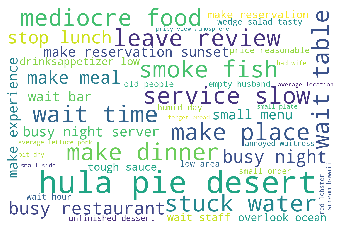

In [49]:
wordc=Counter(t_list)

wordcloud = WordCloud(stopwords=STOPWORDS, width = 1500, height = 1000,
                          background_color='white', 
                      max_words=300).generate_from_frequencies(wordc)
wordcloud.to_file("wordcloud_n_grams.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()